# Instance-Based Learning: K-Nearest Neighbours(kNN)

## 1. Data Preprocessing

In [1]:
#importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')

Data transformation of the categorical attrbutes to numeric

In [3]:
#transformation 
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_train
le = LabelEncoder()
for col in cat_columns:
    train[col] = le.fit_transform(train[col])

# Encode categorical columns using Label Encoding for data_test
le = LabelEncoder()
for col in cat_columns:
    test[col] = le.fit_transform(test[col])


# Print the first 5 rows of the transformed dataset
#print(train.head())
#print(test.head())

In [4]:

#train
x_train_trans = train.drop(columns = ['income'])
y_train = train['income']

#test
x_test_trans = test.drop(columns =['income'])
y_test = test['income']

#print(x_train_trans)
#print(y_train_trans)
#print(x_test_trans)


### Standard Scaling


StandardScaler is being used to standardize the data by removing the mean and scaling to unit variance. This is to ensure that all features are on the same scale, which can improve the performance and accuracy of algorithm

In [5]:
#Standard Scaling

from sklearn import preprocessing

x_train = preprocessing.StandardScaler().fit(x_train_trans).transform(x_train_trans.astype(float))
#print(x_train)

x_test = preprocessing.StandardScaler().fit(x_test_trans).transform(x_test_trans.astype(float))
#print(x_test)


## 2. Using default kNN

Doing a validation of performance and confusion matrix for doing default kNN

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12435
           1       0.65      0.57      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281

ROC_AUC score:  0.7405577019220697


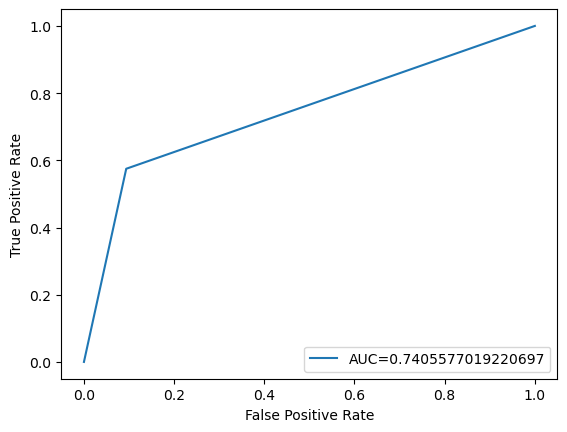

Confusion Matrix: 
 [[11269  1166]
 [ 1635  2211]]


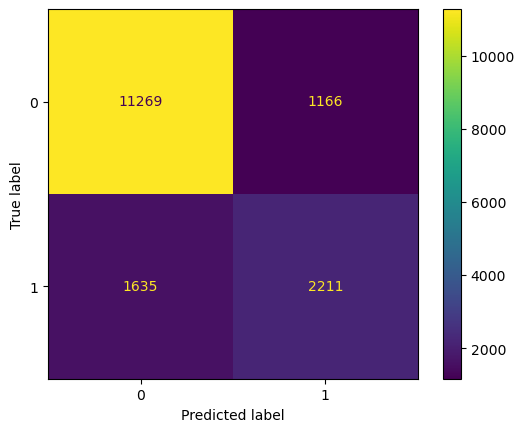

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


#base model
default_knn = KNeighborsClassifier()
default_knn.fit(x_train, y_train)

#predict
y_pred=default_knn.predict(x_test)


#Summarize Result
#precision,recall,f1-score,support, accuracy, macro avg, weighted avg
print(classification_report(y_test,y_pred))

#ROC score
auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC score: ', auc)

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test,y_pred,))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()



## 3. Hyperparameter Tuning

Hyperparameter Tuning for K-neighbours, Distance Metric, weight and Leaf-size.
This will be done by making a grid search and score ranking 

### Method: K-folds Cross Validation
(tell more the reason you use K-folds Cross Validation)


In [7]:
#import sklearn 
#sklearn.metrics.get_scorer_names()

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV


# Creating a parameter of the grid
param_grid = [{
    'n_neighbors': list(range(1, 30, 2)),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights':['uniform','distance'],
    #'algorithm':['auto','ball_tree','kd-tree','brute'],
    'leaf_size' : list(range(1,50, 5))
}]

# Grid search model
knn_grid = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn_grid, param_grid = param_grid, cv =5, scoring = 'roc_auc')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                          'metric': ['euclidean', 'manhattan', 'minkowski'],
                          'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29],
                          'weights': ['uniform', 'distance']}],
             scoring='roc_auc')

In [9]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.078324,0.011652,2.698503,0.043639,1,euclidean,1,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.714106,0.719752,0.721969,0.727203,0.720274,0.720661,0.004206,841
1,0.129650,0.041205,4.898220,1.202617,1,euclidean,1,distance,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.714106,0.719752,0.721969,0.727203,0.720274,0.720661,0.004206,841
2,0.154739,0.010668,8.754483,0.303941,1,euclidean,3,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.809725,0.813553,0.824244,0.824338,0.822946,0.818961,0.006120,821
3,0.158054,0.005896,8.883694,0.267789,1,euclidean,3,distance,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.811008,0.814938,0.823079,0.823102,0.823231,0.819072,0.005133,801
4,0.158480,0.002040,10.555241,0.154946,1,euclidean,5,uniform,"{'leaf_size': 1, 'metric': 'euclidean', 'n_nei...",0.836079,0.844327,0.854930,0.851932,0.853873,0.848228,0.007118,741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.079905,0.005100,4.209031,0.044868,46,minkowski,25,distance,"{'leaf_size': 46, 'metric': 'minkowski', 'n_ne...",0.878708,0.880988,0.884235,0.884234,0.885294,0.882692,0.002462,223
896,0.080218,0.002536,4.269137,0.050095,46,minkowski,27,uniform,"{'leaf_size': 46, 'metric': 'minkowski', 'n_ne...",0.878305,0.881587,0.883921,0.884858,0.885756,0.882886,0.002678,203
897,0.079834,0.005458,4.239748,0.021451,46,minkowski,27,distance,"{'leaf_size': 46, 'metric': 'minkowski', 'n_ne...",0.879186,0.881694,0.884693,0.884426,0.885782,0.883156,0.002399,183
898,0.079939,0.004336,4.320052,0.056499,46,minkowski,29,uniform,"{'leaf_size': 46, 'metric': 'minkowski', 'n_ne...",0.879172,0.881948,0.884418,0.885382,0.886008,0.883386,0.002520,159


Finding the best scorer and hyperparameter to achieve this score

In [19]:
#Best score
print('Best scorer: ', grid_search.best_score_)

#Finding the hyperparameter to achieve this score
print("The list of hyperparmeter in order to achieve this best score: ", grid_search.best_params_)

Best scorer:  0.8892358255938895
The list of hyperparmeter in order to achieve this best score:  {'leaf_size': 16, 'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}


## 4. Model with the best Hyperparameter

In [20]:
#will inserting the cest hyperparameters that been found when grid search is done
best_model = KNeighborsClassifier(n_neighbors=29, weights='uniform', leaf_size= 16, metric="manhattan",)

In [21]:
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)


## 5. Validation Performance and Confusion Matrix

The validation performance and confusion matrix for the best model with the tuned hyperparameter

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281

ROC_AUC score:  0.7463198021286351


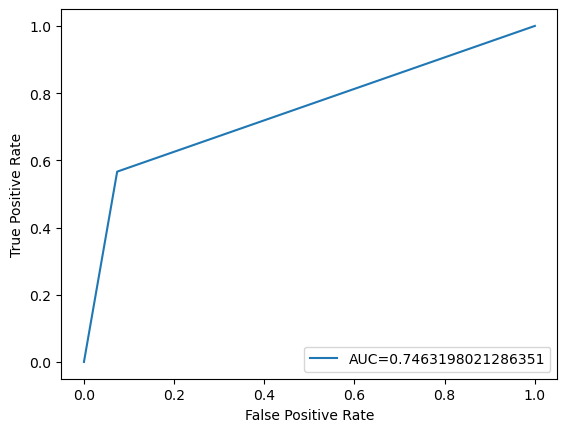

Confusion Matrix: 
 [[11519   916]
 [ 1668  2178]]


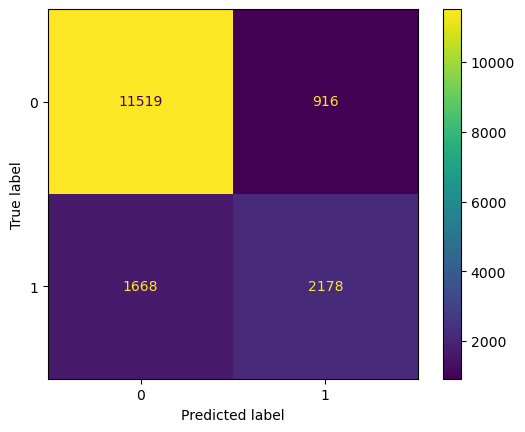

{'leaf_size': 16, 'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'}


In [22]:
#Summarize Result
#precision,recall,f1-score,support, accuracy, macro avg, weighted avg
print(classification_report(y_test,y_pred))

#ROC score
auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC score: ', auc)
#plotting roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test,y_pred,))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#Print the best hyperparameter tuned for the best model again
print(grid_search.best_params_)

## 6. Exporting the model

In [23]:
import joblib
joblib.dump(best_model, 'kNN.pkl', compress=9)

#what is compress=9, do we need that

['kNN.pkl']